# Power Analysis & Sampling Bias Simulation in Clinical Trials  
**Author:** eex(NS)  
**Date:** 2025-03-03 

## Description  
This Jupyter Notebook performs power analysis and sampling bias simulations using R in an interactive format.  

## Introduction  
Clinical trials often face a trade-off:  
- **Small but highly accurate datasets (95% accuracy)**  
- **Large but error-prone datasets (60% accuracy)**  

We will use **Monte Carlo simulations** and **power analysis** to determine the impact of data quality on estimating drug utilization rates.  


## Load Required Libraries  
We use R libraries for power analysis, simulations, and visualization.

In [5]:
library(pwr)         # Power analysis  
library(simstudy)    # Simulating data  
library(boot)        # Bootstrapping  
library(ggplot2)     # Data visualization  
library(dplyr)       # Data manipulation  

## Define Study Parameters  
We define key parameters for the study:  
- **True utilization rate:** 20% of patients use the drug.  
- **Small dataset:** 500 samples with 95% accuracy.  
- **Large dataset:** 5000 samples with 60% accuracy.  
- **Error rates:** Comparing a **5%** vs **40%** error rate.  


In [6]:
# Set parameters  
true_utilization <- 0.20  # True national utilization rate
small_sample_size <- 500  # Small, highly accurate dataset
large_sample_size <- 5000  # Large, error-prone dataset
accuracy_small <- 0.95  # 95% accurate data
accuracy_large <- 0.60  # 60% accurate data
error_rates <- c(0.05, 0.40)  # Comparing 5% and 40% error rates

## Generate Simulated Data with Errors  
We generate two datasets:  
- A **small but highly accurate dataset** (95% accuracy).  
- A **large but error-prone dataset** (60% accuracy).  

Each dataset introduces errors **to mimic real-world clinical data challenges**.  

In [7]:
generate_data <- function(n, accuracy) {  
  true_labels <- rbinom(n, 1, true_utilization)  # True values  
  observed_labels <- ifelse(runif(n) < accuracy, true_labels, 1 - true_labels)  # Introduce errors  
  return(data.frame(True = true_labels, Observed = observed_labels))  
}  

In [8]:
# Generate datasets
small_accurate_data <- generate_data(small_sample_size, accuracy_small)
large_error_prone_data <- generate_data(large_sample_size, accuracy_large)

## Power Analysis  
We calculate statistical power to determine how different sample sizes affect the accuracy of our clinical trial results.  

**Key step:**  
- Compute **effect size** for the difference in observed vs. true utilization.  
- Use **power analysis** to determine the sample size needed for reliable results.  

In [9]:
calculate_power <- function(n, effect_size, sig_level = 0.05, power = NULL) {  
  return(pwr.p.test(h = effect_size, n = n, sig.level = sig_level, power = power))  
}  

# Calculate effect size  
effect_size <- ES.h(p1 = true_utilization, p2 = mean(small_accurate_data$Observed))  

# Compute power analysis  
power_small <- calculate_power(n = small_sample_size, effect_size = effect_size)  
power_large <- calculate_power(n = large_sample_size, effect_size = effect_size)  

## Monte Carlo Simulation  
We run 1000 simulations for each dataset to estimate utilization rates and visualize sampling bias.  

In [10]:
simulate_sampling_bias <- function(n, accuracy, iterations = 1000) {
  results <- replicate(iterations, {
    data <- generate_data(n, accuracy)
    mean(data$Observed)  # Estimate utilization rate
  })
  return(results)
}

# Run simulations
set.seed(123)
sim_small <- simulate_sampling_bias(small_sample_size, accuracy_small)
sim_large <- simulate_sampling_bias(large_sample_size, accuracy_large)

## Visualization of Sampling Bias  
The density plot shows how different sampling errors affect utilization estimates.  

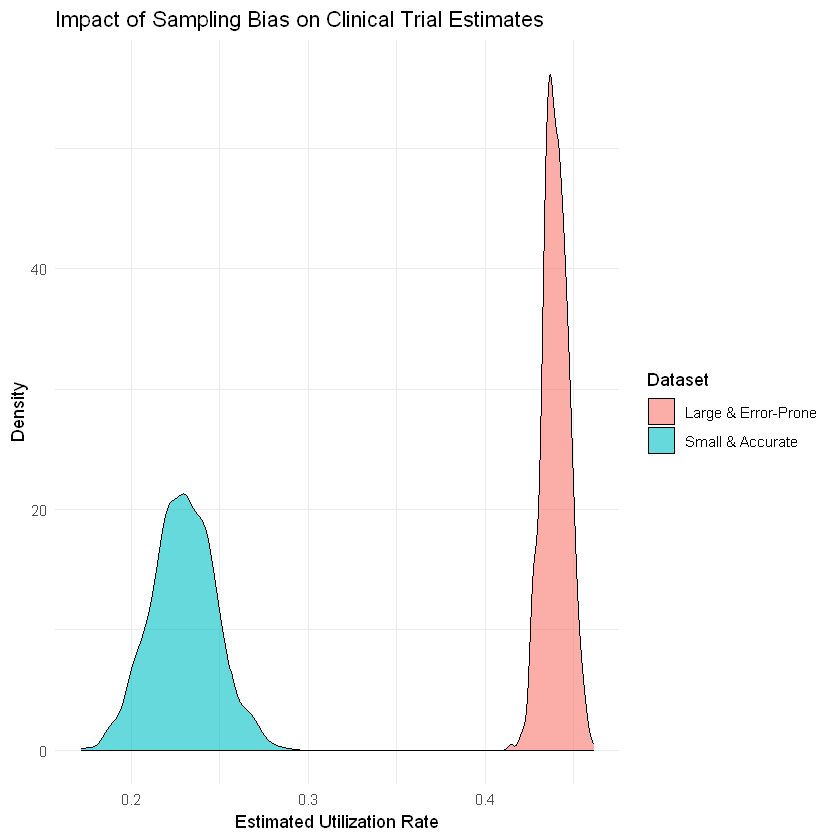

In [11]:
plot_data <- data.frame(
  Utilization = c(sim_small, sim_large),
  Dataset = rep(c("Small & Accurate", "Large & Error-Prone"), each = length(sim_small))
)

ggplot(plot_data, aes(x = Utilization, fill = Dataset)) +
  geom_density(alpha = 0.6) +
  theme_minimal() +
  labs(title = "Impact of Sampling Bias on Clinical Trial Estimates",
       x = "Estimated Utilization Rate",
       y = "Density")

## Conclusion  
- **Small but accurate datasets produce more reliable estimates.**  
- **Large error-prone datasets introduce bias and variability.**  
- **Power analysis helps determine the ideal sample size for reliable clinical trial results.**  

This analysis provides **data-driven insights** to optimize sampling strategies in clinical trials.  